In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


## Load the dataset

In [2]:
dataset = pd.read_csv('/content/CreditDataset.csv')
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


## Mengubah fitur kategori menjadi numerik

In [4]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

## Pisahkan data menjadi fitur (x) dan target (y)

In [5]:
x = dataset.drop(columns=['Class'])
y = dataset['Class']

if len(y.unique()) > 2:
    y = (y == 1).astype(int)

## Memisahkan data menjadi training set dan testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Decision tree menggunakan ROC

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

## Evaluasi model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy:, {accuracy:.3f}")
print(f"Precision:, {precision:.3f}")
print(f"Recall:, {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")

Accuracy:, 0.730
Precision:, 0.777
Recall:, 0.865
F1 Score: 0.819
ROC AUC Score: 0.636


## Menghitung dan menampilkan confusion matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[122  19]
 [ 35  24]]


## Visualisasi ROC

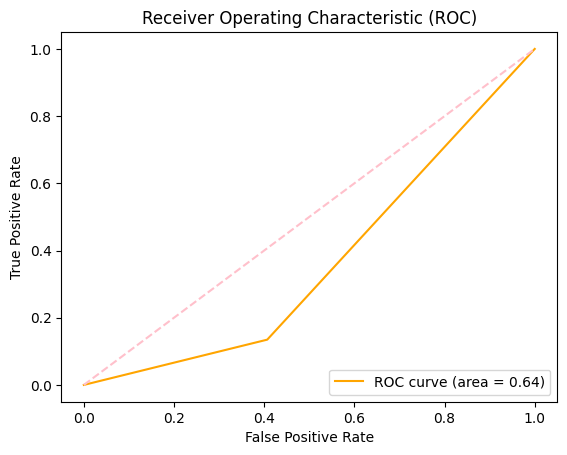

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Visualisasi decicion tree

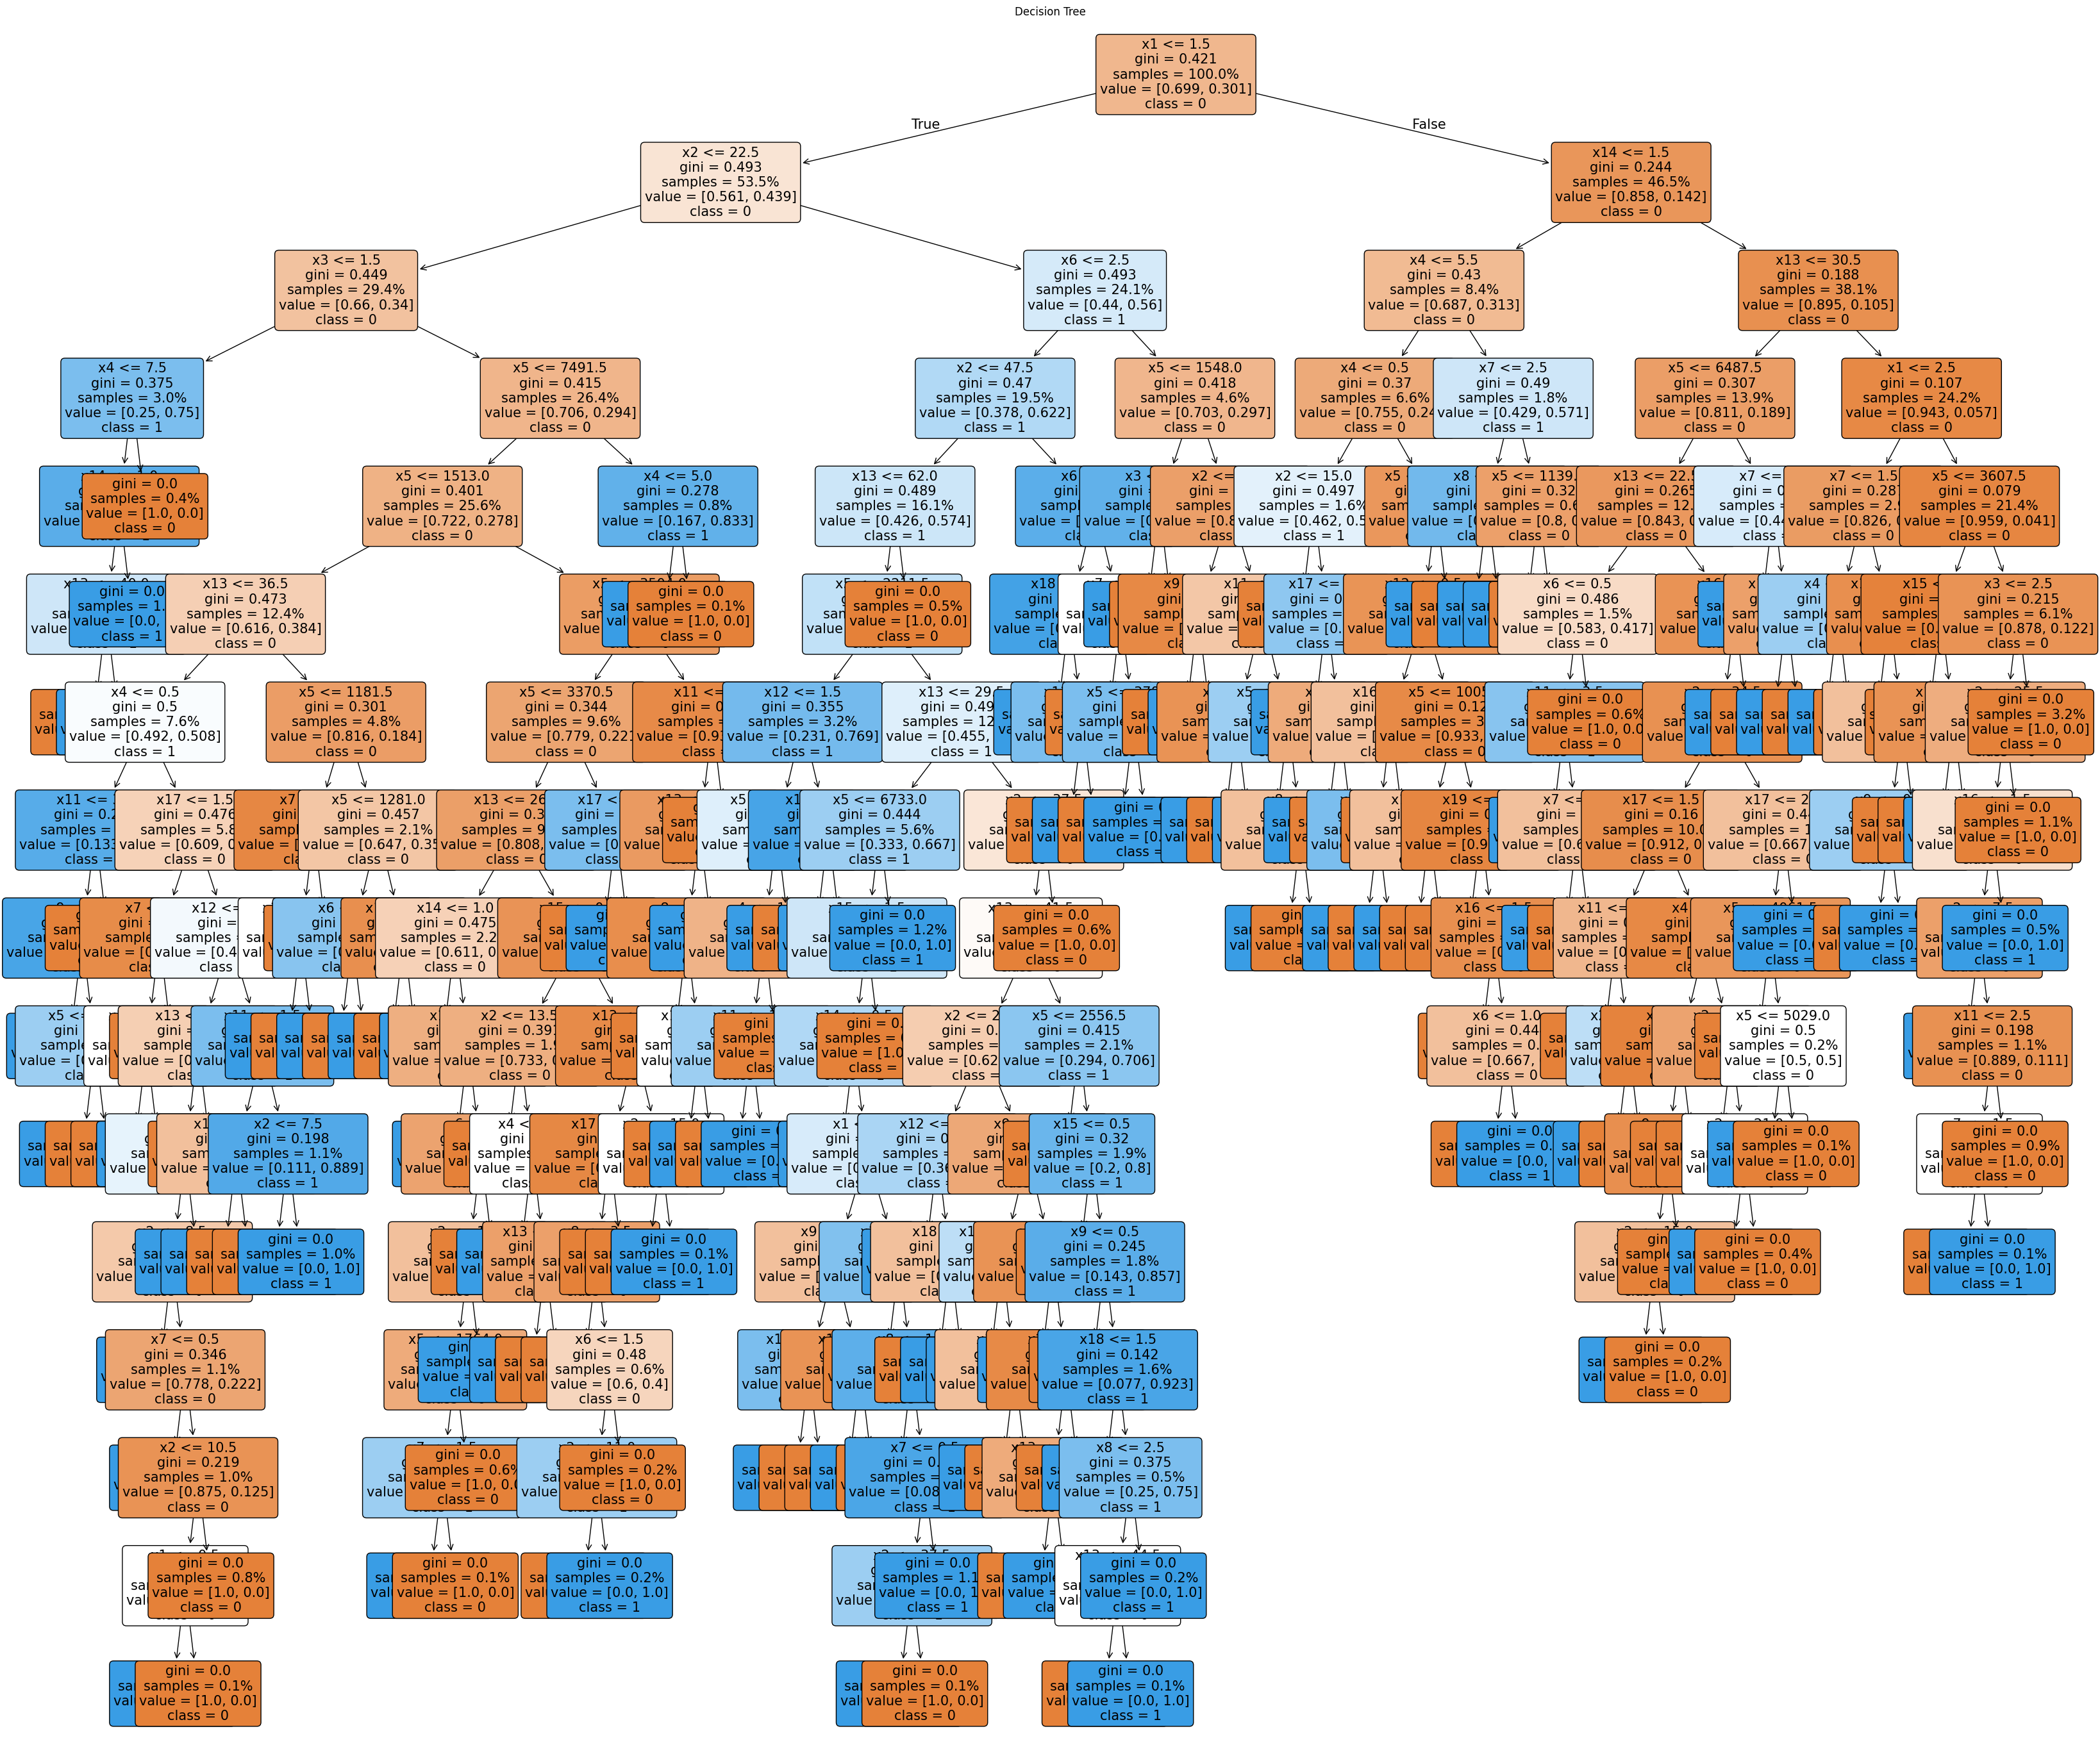

In [32]:
plt.figure(figsize=(40, 35))
plot_tree(model, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=15, proportion=True)
plt.title("Decision Tree")
plt.show()


## K-NN

## Mengubah fitur kategori menjadi numerik

In [33]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])
    label_encoders[column] = le

## Pisahkan data menjadi fitur (x) dan target (y)



In [34]:
X = dataset.drop(columns=['Class'])
y = dataset['Class']

if len(y.unique()) > 2:
    y = (y == 1).astype(int)

## Memisahkan data menjadi training set dan testing set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Inialisasi model K-NN

In [36]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

## Melatih model

In [37]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

## Evaluasi model

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Akurasi: {accuracy:.3f}')
print(f'Presisi: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'ROC-AUC Score: {roc_auc:.3f}')

Akurasi: 0.685
Presisi: 0.732
Recall: 0.872
F1 Score: 0.796
ROC-AUC Score: 0.561


## Confusion matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[123  18]
 [ 45  14]]


## Visualisasi kurva ROC

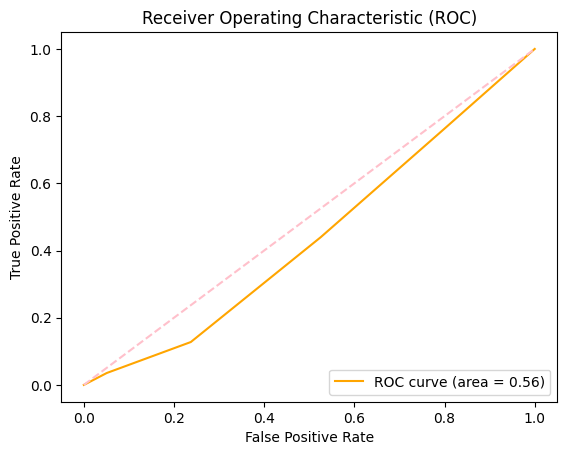

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()